In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from jax import config
config.update("jax_enable_x64", True)

In [76]:
# trust rergion optimization functions
from opentn.trust_region_rcopt import riemannian_trust_region_optimize
from opentn.stiefel import retract_stiefel
from opentn.transformations import create_kitaev_liouvillians, super2ortho, create_trotter_layers
from opentn.optimization import frobenius_norm, model_stiefel_local, get_kitaev_trotter_local_ansatz
from opentn.stiefel import gradient_stiefel_vec, riemannian_hessian_vec
from opentn.optimization import compute_kitaev_approximation_error
# plotting
import matplotlib.pyplot as plt
import numpy as np
from opentn.utils import set_discrete_labels

# Is there a sweet spot for the final time $\tau$ so that the error is not so small that is close to machine precision but not that big either?

In [23]:
d, N, gamma = 2, 4, 1
Lvec, Lvec_odd, Lvec_even, Lnn = create_kitaev_liouvillians(N=N, d=d, gamma=gamma, pbc=True)


# $\tau = 4$

In [123]:
tau = 4
exp_Lvec_4, exp_Lvec_odd, exp_Lvec_even = create_trotter_layers([Lvec, Lvec_odd, Lvec_even], tau=tau)
f_stiefel = lambda xi: frobenius_norm(model_stiefel_local(xi, N, d, ), exp_Lvec_4)
grad_stiefel = lambda xi: gradient_stiefel_vec(xi, f_stiefel, metric='canonical')
hessian_stiefel = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='canonical')

In [25]:
xs_timestep_1_tau_4 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=1)]
xs_timestep_1_tau_4_opt, f_timestep_1_tau_4_opt, radius_timestep_1_tau_4_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_1_tau_4, save_x=True, niter=5
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.14312675894435722
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.13002471019042547
radius 0.02
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.12654491285589115
radius 0.02
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.12651185210270646
radius 0.02
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.12651185091251438
radius 0.02


In [51]:
xs_timestep_2_tau_4 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=2)]
xs_timestep_2_tau_4_opt, f_timestep_2_tau_4_opt, radius_timestep_2_tau_4_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_2_tau_4, save_x=True, niter=10)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.03642548983767189
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.03202135021487922
radius 0.02
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.03016336843715153
radius 0.04
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.027416735890081242
radius 0.04
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.023321903279321515
radius 0.08
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.021091481042822515
radius 0.02
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.021091481042822515
radius 0.04
iteration: 7
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.020828013430656874
radius 0.04
iteration: 8
column : 0
column : 1
column : 2
column : 3
column : 4
cost fu

In [27]:
xs_timestep_3_tau_4 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=3)]
xs_timestep_3_tau_4_opt, f_timestep_3_tau_4_opt, radius_timestep_3_tau_4_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_3_tau_4, save_x=True, niter=5)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.01624165329083148
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.013526775575771203
radius 0.02
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.012149061145596598
radius 0.04
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.009677566353905664
radius 0.01
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.009677566353905664
radius 0.02


In [92]:
xs_timestep_4_tau_4 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=4)]
xs_timestep_4_tau_4_opt, f_timestep_4_tau_4_opt, radius_timestep_4_tau_4_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_4_tau_4, save_x=True, niter=5)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.009146253129779604
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.007242126956113565
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.005948806316260928
radius 0.02
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0050527336031081505
radius 0.02
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.004932799860619908
radius 0.02


In [100]:
xs_timestep_5_tau_4 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=5)]
xs_timestep_5_tau_4_opt, f_timestep_5_tau_4_opt, radius_timestep_5_tau_4_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_5_tau_4, save_x=True, niter=10)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 0.00585665746165227
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 0.004544943521027294
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 0.003981427769889008
radius 0.0025
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 0.0037195452541604565
radius 0.0025
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 0.0032022694737739673
radius 0.005
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5


In [101]:
# cost function ratios for different time steps
ratios_tau_4_ts_1 = [cost/f_timestep_1_tau_4_opt[0] for cost in f_timestep_1_tau_4_opt]
ratios_tau_4_ts_2 = [cost/f_timestep_2_tau_4_opt[0] for cost in f_timestep_2_tau_4_opt]
ratios_tau_4_ts_3 = [cost/f_timestep_3_tau_4_opt[0] for cost in f_timestep_3_tau_4_opt]
ratios_tau_4_ts_4 = [cost/f_timestep_4_tau_4_opt[0] for cost in f_timestep_4_tau_4_opt]
ratios_tau_4_ts_5= [cost/f_timestep_5_tau_4_opt[0] for cost in f_timestep_5_tau_4_opt]

In [89]:
ratios_tau_4_ts_1

[DeviceArray(1., dtype=float64),
 DeviceArray(0.90845843, dtype=float64),
 DeviceArray(0.88414573, dtype=float64),
 DeviceArray(0.88391474, dtype=float64),
 DeviceArray(0.88391473, dtype=float64)]

In [90]:
ratios_tau_4_ts_2

[DeviceArray(1., dtype=float64),
 DeviceArray(0.87909182, dtype=float64),
 DeviceArray(0.82808409, dtype=float64),
 DeviceArray(0.75267995, dtype=float64),
 DeviceArray(0.64026327, dtype=float64),
 DeviceArray(0.57903081, dtype=float64),
 DeviceArray(0.57903081, dtype=float64),
 DeviceArray(0.57179776, dtype=float64),
 DeviceArray(0.57128261, dtype=float64),
 DeviceArray(0.57128261, dtype=float64)]

In [102]:
# error suzuki
error_suzuki_tau_4 = [compute_kitaev_approximation_error(d, N, gamma, tau=4, n=n) for n in range(1,10)]
error_stiefel_tau_4 = [values[-1] for values in [f_timestep_1_tau_4_opt, f_timestep_2_tau_4_opt, f_timestep_3_tau_4_opt, f_timestep_4_tau_4_opt, f_timestep_5_tau_4_opt]]

In [128]:
norm_4 = np.linalg.norm(exp_Lvec_4, ord='fro')
print(norm_4)
error_suzuki_tau_4_scaled = [e/norm_4 for e in error_suzuki_tau_4]
error_stiefel_tau_4_scaled = [e/norm_4 for e in error_stiefel_tau_4]

8.667802101852518


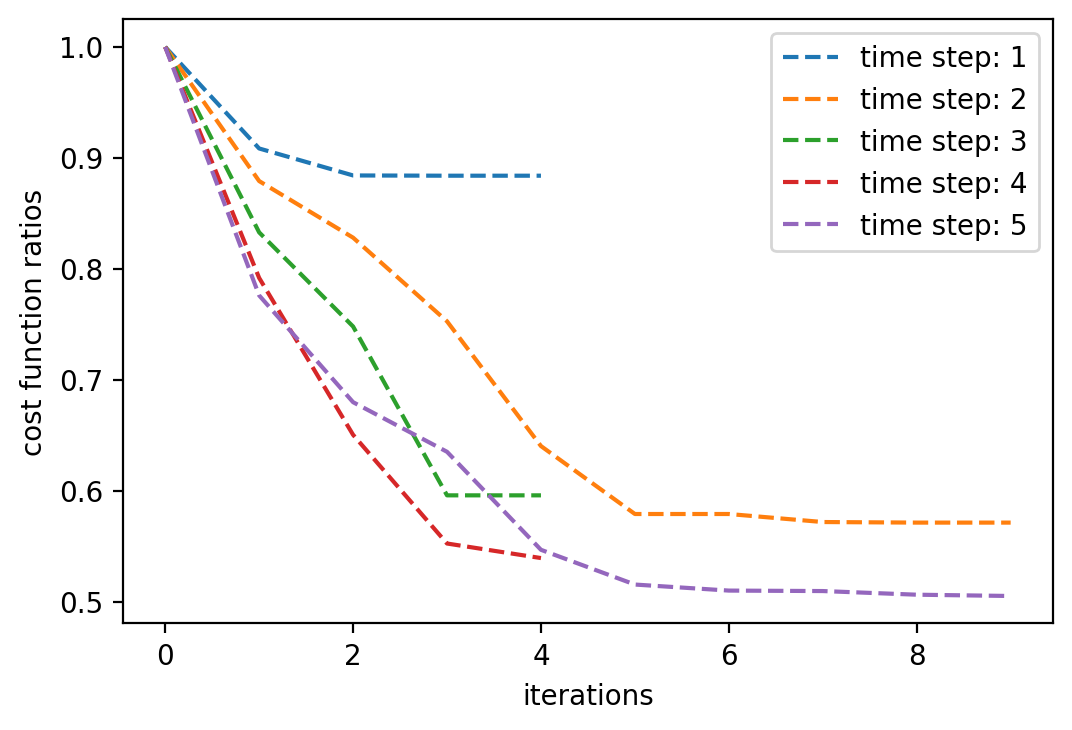

In [104]:
plt.figure(dpi=200)
plt.ylabel('cost function ratios')
plt.xlabel('iterations')
plt.plot(ratios_tau_4_ts_1, '--', label='time step: 1')
plt.plot(ratios_tau_4_ts_2, '--', label='time step: 2')
plt.plot(ratios_tau_4_ts_3 , '--', label='time step: 3')
plt.plot(ratios_tau_4_ts_4 , '--', label='time step: 4')
plt.plot(ratios_tau_4_ts_5 , '--', label='time step: 5')
plt.legend()

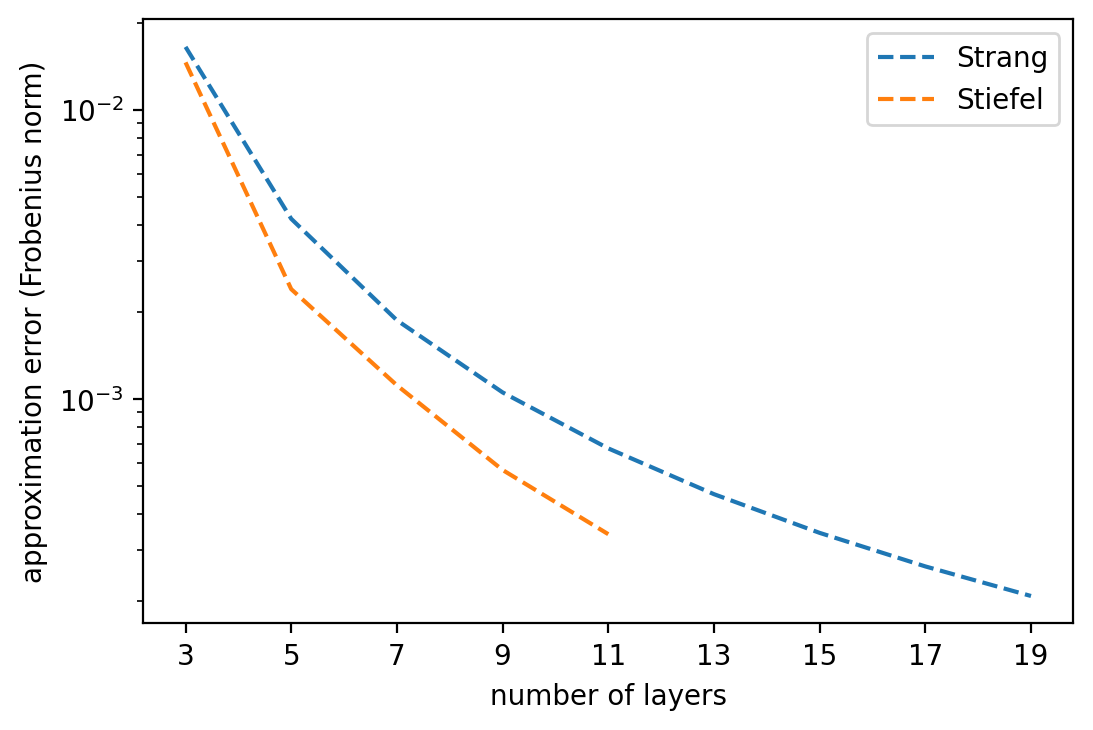

In [129]:
fig = plt.figure(dpi=200)
ax = plt.gca()
plt.ylabel('approximation error (Frobenius norm)')
plt.xlabel('number of layers')
plt.semilogy(error_suzuki_tau_4_scaled, '--', label='Strang')
plt.semilogy(error_stiefel_tau_4_scaled, '--', label='Stiefel')
set_discrete_labels(labels=[str(index) for index in (2*np.arange(1,len(error_suzuki_tau_4_scaled)+1) + 1)], ax=ax, rotation=0)
plt.legend()

# $\tau = 2$

In [32]:
tau = 2
exp_Lvec, exp_Lvec_odd, exp_Lvec_even = create_trotter_layers([Lvec, Lvec_odd, Lvec_even], tau=tau)
f_stiefel = lambda xi: frobenius_norm(model_stiefel_local(xi, N, d, ), exp_Lvec)
grad_stiefel = lambda xi: gradient_stiefel_vec(xi, f_stiefel, metric='canonical')
hessian_stiefel = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='canonical')

In [33]:
xs_timestep_1_tau_2 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=1)]
xs_timestep_1_tau_2_opt, f_timestep_1_tau_2_opt, radius_timestep_1_tau_2_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_1_tau_2, save_x=True, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.033448358887552675
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.029103915654672886
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.028344584615548934
radius 0.01
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.028342115258690483
radius 0.01
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.02834211525680168
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.02834211525680168
radius 0.000625
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.02834211525680168
radius 0.00015625
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.02834211525680168
radius 3.90625e-05
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.02834211525680168
radius 9.765625e-06
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.02834211525680168
radius 2.44140625e-06
iteration: 10
column : 0
colu

In [34]:
xs_timestep_2_tau_2 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=2)]
xs_timestep_2_tau_2_opt, f_timestep_2_tau_2_opt, radius_timestep_2_tau_2_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_2_tau_2, save_x=True, niter=20)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.008409476069802982
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.006990790479444976
radius 0.02
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.006335104472942629
radius 0.02
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.005879704294342512
radius 0.02
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.005092754811522045
radius 0.005
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.005092754811522045
radius 0.01
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.004696530105793387
radius 0.02
iteration: 7
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.004415396079806037
radius 0.02
iteration: 8
column : 0
column : 1
column : 2
column : 3
column : 4
cos

In [35]:
xs_timestep_3_tau_2 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=3)]
xs_timestep_3_tau_2_opt, f_timestep_3_tau_2_opt, radius_timestep_3_tau_2_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_3_tau_2, save_x=True, niter=20)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0037414431490474715
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.003189123349225599
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.002714403301424459
radius 0.01
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.002283033715711459
radius 0.01
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0019504495101794418
radius 0.01
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0018411629278981
radius 0.02
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0017329576729861143
radius 0.005
iteration: 7
column : 0
column :

In [36]:
# cost function ratios for different time steps
ratios_tau_2_ts_1 = [cost/f_timestep_1_tau_2_opt[0] for cost in f_timestep_1_tau_2_opt]
ratios_tau_2_ts_2 = [cost/f_timestep_2_tau_2_opt[0] for cost in f_timestep_2_tau_2_opt]
ratios_tau_2_ts_3 = [cost/f_timestep_3_tau_2_opt[0] for cost in f_timestep_3_tau_2_opt]

In [74]:
error_suzuki_tau_2 = [compute_kitaev_approximation_error(d, N, gamma, tau=2, n=n) for n in range(1,10)]
error_stiefel_tau_2 = [values[-1] for values in [f_timestep_1_tau_2_opt, f_timestep_2_tau_2_opt, f_timestep_3_tau_2_opt]]

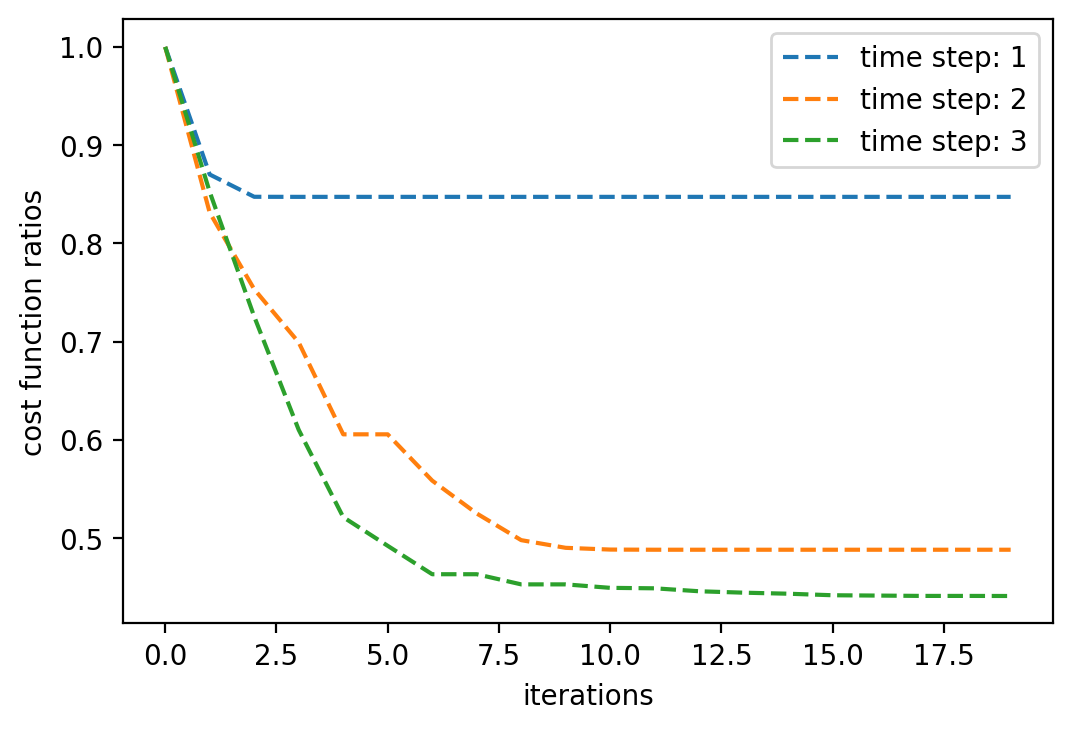

In [37]:
plt.figure(dpi=200)
plt.ylabel('cost function ratios')
plt.xlabel('iterations')
plt.plot(ratios_tau_2_ts_1, '--', label='time step: 1')
plt.plot(ratios_tau_2_ts_2, '--', label='time step: 2')
plt.plot(ratios_tau_2_ts_3 , '--', label='time step: 3')
plt.legend()

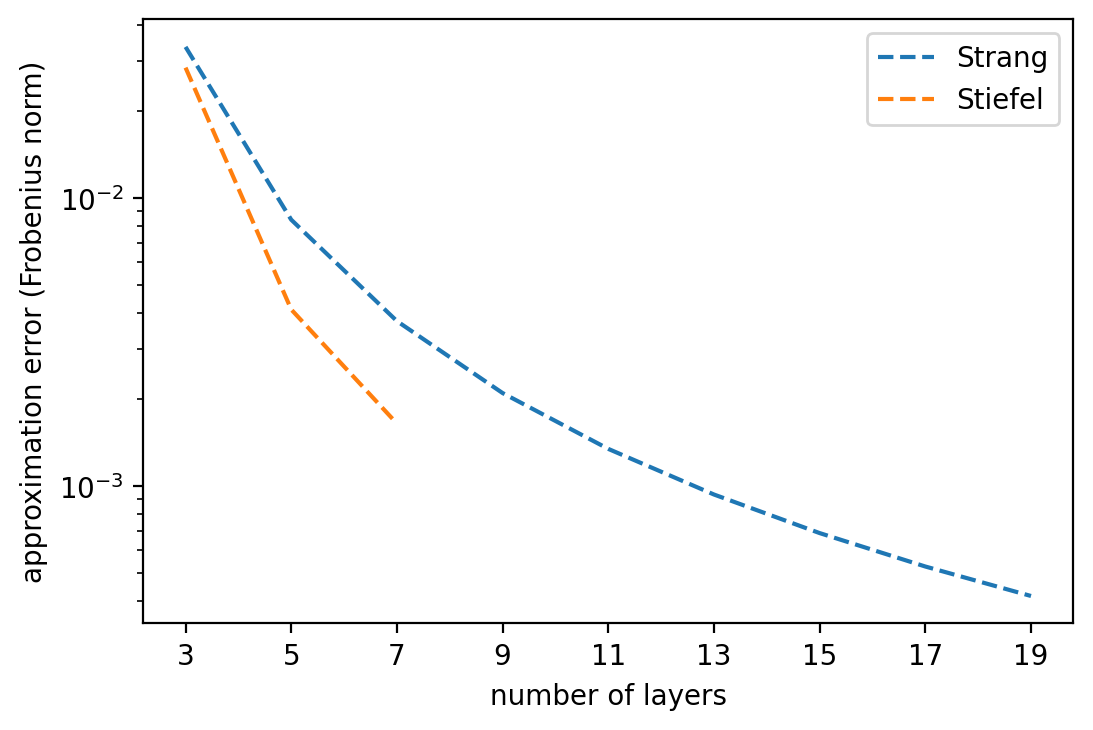

In [77]:
fig = plt.figure(dpi=200)
ax = plt.gca()
plt.ylabel('approximation error (Frobenius norm)')
plt.xlabel('number of layers')
plt.semilogy(error_suzuki_tau_2, '--', label='Strang')
plt.semilogy(error_stiefel_tau_2, '--', label='Stiefel')
set_discrete_labels(labels=[str(index) for index in (2*np.arange(1,len(error_suzuki_tau_2)+1) + 1)], ax=ax, rotation=0)
plt.legend()

# $\tau = 1$

In [38]:
tau = 1
exp_Lvec, exp_Lvec_odd, exp_Lvec_even = create_trotter_layers([Lvec, Lvec_odd, Lvec_even], tau=tau)
f_stiefel = lambda xi: frobenius_norm(model_stiefel_local(xi, N, d, ), exp_Lvec)
grad_stiefel = lambda xi: gradient_stiefel_vec(xi, f_stiefel, metric='canonical')
hessian_stiefel = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='canonical')

In [40]:
xs_timestep_1_tau_1 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=1)]
xs_timestep_1_tau_1_opt, f_timestep_1_tau_1_opt, radius_timestep_1_tau_1_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_1_tau_1, save_x=True, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.005992052805370799
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.005179546089593455
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.004968869961170965
radius 0.01
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.00496715711712558
radius 0.01
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.004967157113909462
radius 0.01
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.00496715711390933
radius 0.0025
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.00496715711390933
radius 0.000625
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.00496715711390933
radius 0.00015625
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.00496715711390933
radius 3.90625e-05
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.00496715711390933
radius 9.765625e-06


In [46]:
xs_timestep_2_tau_1 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=2)]
xs_timestep_2_tau_1_opt, f_timestep_2_tau_1_opt, radius_timestep_2_tau_1_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_2_tau_1, save_x=True, niter=20)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0015003228414415567
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0015003228414415567
radius 0.0025
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0012899560077915995
radius 0.005
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0011963353491286884
radius 0.01
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0011472388051221108
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0011472388051221108
radius 0.005
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0010822344505412636
radius 0.005
iteration: 7
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0010526946205771715
radius 0.005
iteration: 8
column : 0
column : 1
column : 2
column :

In [47]:
xs_timestep_3_tau_1 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=3)]
xs_timestep_3_tau_1_opt, f_timestep_3_tau_1_opt, radius_timestep_3_tau_1_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_3_tau_1, save_x=True, niter=20)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0006670002231771639
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0006670002231771639
radius 0.0025
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0005597474477551285
radius 0.0025
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0005060980689836066
radius 0.005
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0004657673579950943
radius 0.005
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0004484933170580338
radius 0.01
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0003786516418230549
radius 0.0025
iteration: 7
colu

In [153]:
f_timestep_1_tau_1_opt[0], f_timestep_2_tau_1_opt[0], f_timestep_3_tau_1_opt[0]

(DeviceArray(0.00599205, dtype=float64),
 DeviceArray(0.00150032, dtype=float64),
 DeviceArray(0.000667, dtype=float64))

In [48]:
# cost function ratios for different time steps
ratios_tau_1_ts_1 = [cost/f_timestep_1_tau_1_opt[0] for cost in f_timestep_1_tau_1_opt]
ratios_tau_1_ts_2 = [cost/f_timestep_2_tau_1_opt[0] for cost in f_timestep_2_tau_1_opt]
ratios_tau_1_ts_3 = [cost/f_timestep_3_tau_1_opt[0] for cost in f_timestep_3_tau_1_opt]

In [157]:
from opentn.optimization import compute_trotter_approximation_error
from opentn.transformations import get_kitaev_nn_linbladian
error_test = [compute_trotter_approximation_error(d, N, tau=1, n=n, Li=[get_kitaev_nn_linbladian(gamma)]) for n in range(1,10)]


In [80]:
error_suzuki_tau_1 = [compute_kitaev_approximation_error(d, N, gamma, tau=1, n=n) for n in range(1,10)]
error_stiefel_tau_1 = [values[-1] for values in [f_timestep_1_tau_1_opt, f_timestep_2_tau_1_opt, f_timestep_3_tau_1_opt]]

In [159]:
np.allclose(error_test, error_suzuki_tau_1)

True

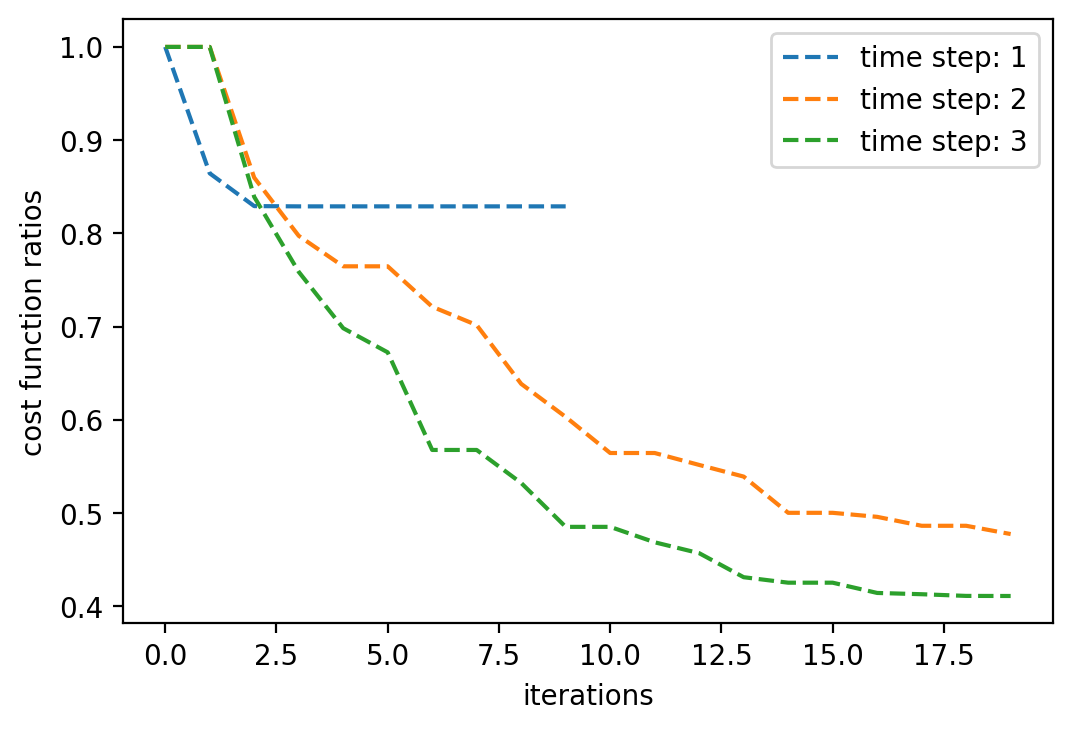

In [49]:
plt.figure(dpi=200)
plt.ylabel('cost function ratios')
plt.xlabel('iterations')
plt.plot(ratios_tau_1_ts_1, '--', label='time step: 1')
plt.plot(ratios_tau_1_ts_2, '--', label='time step: 2')
plt.plot(ratios_tau_1_ts_3 , '--', label='time step: 3')
plt.legend()

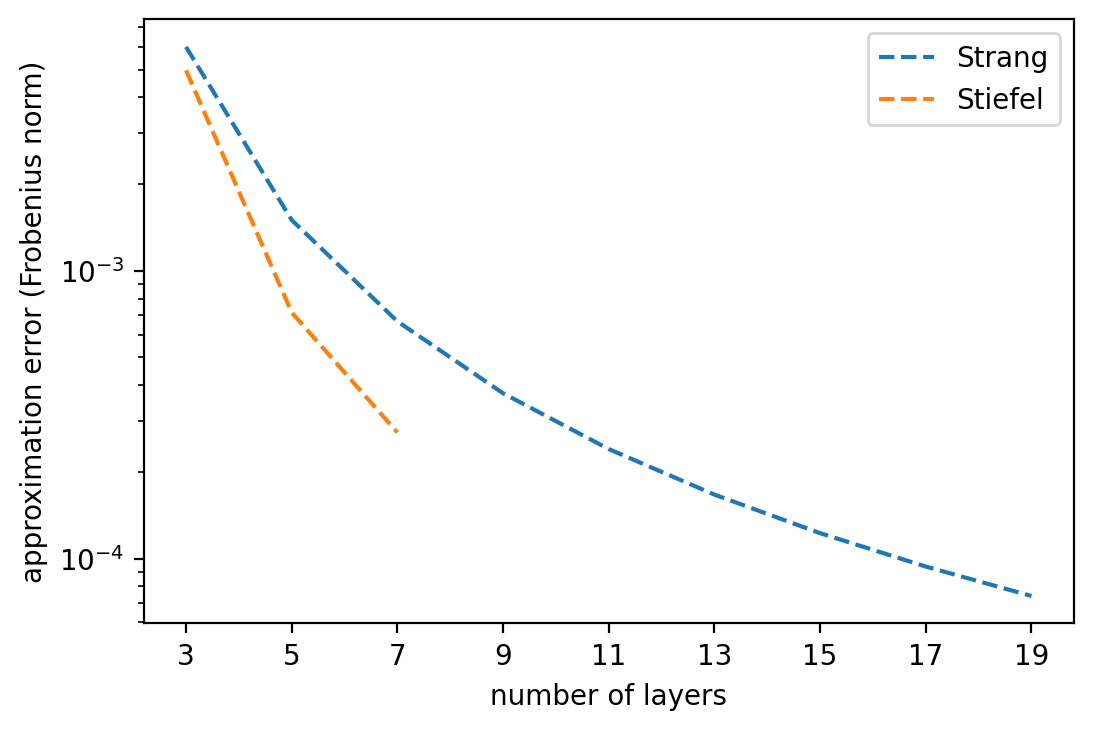

In [81]:
fig = plt.figure(dpi=200)
ax = plt.gca()
plt.ylabel('approximation error (Frobenius norm)')
plt.xlabel('number of layers')
plt.semilogy(error_suzuki_tau_1, '--', label='Strang')
plt.semilogy(error_stiefel_tau_1, '--', label='Stiefel')
set_discrete_labels(labels=[str(index) for index in (2*np.arange(1,len(error_suzuki_tau_1)+1) + 1)], ax=ax, rotation=0)
plt.legend()

# $\tau = 0.5$

In [146]:
tau = 0.5
exp_Lvec_half, exp_Lvec_odd, exp_Lvec_even = create_trotter_layers([Lvec, Lvec_odd, Lvec_even], tau=tau)
f_stiefel = lambda xi: frobenius_norm(model_stiefel_local(xi, N, d, ), exp_Lvec_half)
grad_stiefel = lambda xi: gradient_stiefel_vec(xi, f_stiefel, metric='canonical')
hessian_stiefel = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='canonical')

In [147]:
xs_timestep_1_tau_half = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=1)]
xs_timestep_1_tau_half_opt, f_timestep_1_tau_half_opt, radius_timestep_1_tau_half_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_1_tau_half, save_x=True, niter=10)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.0009094097438186602
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.0007849392896681515
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.0007460237323221594
radius 0.01
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.0007455314479190697
radius 0.01
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 0.000625
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 0.00015625
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 3.90625e-05
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 9.765625e-06
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 2.44140625e-06


In [66]:
xs_timestep_2_tau_half = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=2)]
xs_timestep_2_tau_half_opt, f_timestep_2_tau_half_opt, radius_timestep_2_tau_half_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_2_tau_half, save_x=True, niter=30)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.00022744282911377092
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.00022744282911377092
radius 0.0025
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.00020082716091061748
radius 0.0025
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.0001895764763260892
radius 0.0025
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.00017147013101718293
radius 0.000625
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.00017147013101718293
radius 0.00125
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.000169751598096388
radius 0.0025
iteration: 7
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.00016695100007875307
radius 0.000625
iteration: 8
column : 0
column : 1
col

In [57]:
xs_timestep_3_tau_half = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=3)]
xs_timestep_3_tau_half_opt, f_timestep_3_tau_half_opt, radius_timestep_3_tau_half_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_3_tau_half, save_x=True, niter=20)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 8.683456174452144e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 8.057457489310344e-05
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 7.75617665244817e-05
radius 0.0025
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 7.291728994124023e-05
radius 0.0025
iterat

In [67]:
xs_timestep_3_tau_half_opt_2, f_timestep_3_tau_half_opt_2, radius_timestep_3_tau_half_opt_2 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_3_tau_half_opt[-1], save_x=True, niter=10, radius_init=radius_timestep_3_tau_half_opt)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 4.667990559567922e-05
radius 0.000625
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 4.639957362084336e-05
radius 0.00125
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 4.5673362629003554e-05
radius 0.00125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 4.477017698181486e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 4.33357557544967e-05
radius 0.0003125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 4.33357557544967e-05
radius 0.000625
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 4.311498662390323e-05
radius 0.00125
ite

In [84]:
xs_timestep_4_tau_half = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=4)]
xs_timestep_4_tau_half_opt, f_timestep_4_tau_half_opt, radius_timestep_4_tau_half_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_4_tau_half, save_x=True, niter=30)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.847453997919718e-05
radius 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.443776489397546e-05
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.1760963209837824e-05
radius 0.00125
iteration: 6


In [111]:
xs_timestep_5_tau_half = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=5)]
xs_timestep_5_tau_half_opt, f_timestep_5_tau_half_opt, radius_timestep_5_tau_half_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_5_tau_half, save_x=True, niter=10)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 3.639490207346811e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 3.639490207346811e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 3.639490207346811e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 3.1080485222156604e-05
radius 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 2.7534079218351067e-05
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
colu

In [115]:
xs_timestep_5_tau_half_opt_2, f_timestep_5_tau_half_opt_2, radius_timestep_5_tau_half_opt_2 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_timestep_5_tau_half_opt[-1], save_x=True, niter=20, radius_init=radius_timestep_5_tau_half_opt)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 1.8010445210893822e-05
radius 0.000625
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 1.6019408701337456e-05
radius 0.00015625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 1.6019408701337456e-05
radius 0.0003125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 1.584610728179288e-05
radius 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
column : 9
column : 10
cost function: 1.5526428647178062e-05
radius 0.000625
iteration: 5
column : 0
column : 1
column : 2
column 

In [116]:
ratios_tau_half_ts_1 = [cost/f_timestep_1_tau_half_opt[0] for cost in f_timestep_1_tau_half_opt]
ratios_tau_half_ts_2 = [cost/f_timestep_2_tau_half_opt[0] for cost in f_timestep_2_tau_half_opt]
ratios_tau_half_ts_3 = [cost/f_timestep_3_tau_half_opt[0] for cost in f_timestep_3_tau_half_opt + f_timestep_3_tau_half_opt_2]
ratios_tau_half_ts_4 = [cost/f_timestep_4_tau_half_opt[0] for cost in f_timestep_4_tau_half_opt]
ratios_tau_half_ts_5 = [cost/f_timestep_5_tau_half_opt[0] for cost in f_timestep_5_tau_half_opt + f_timestep_5_tau_half_opt_2]

In [117]:
error_suzuki_tau_half = [compute_kitaev_approximation_error(d, N, gamma, tau=0.5, n=n) for n in range(1,10)]
error_stiefel_tau_half = [values[-1] for values in [f_timestep_1_tau_half_opt, f_timestep_2_tau_half_opt, f_timestep_3_tau_half_opt + f_timestep_3_tau_half_opt_2, f_timestep_4_tau_half_opt,f_timestep_5_tau_half_opt+f_timestep_5_tau_half_opt_2]]

In [131]:
# I should scale all of these values by the norm of the operators that results from each tau
norm_half = np.linalg.norm(exp_Lvec_half, ord='fro')
print(norm_half)
error_suzuki_tau_half_scaled = [e/norm_half for e in error_suzuki_tau_half]
error_stiefel_tau_half_scaled = [e/norm_half for e in error_stiefel_tau_half]

14.233275309418968


In [138]:
import jax.scipy as jscipy
np.linalg.norm(jscipy.linalg.expm(Lvec*4))

8.667802101852518

In [145]:
np.linalg.norm(jscipy.linalg.expm(Lvec*0.5))

14.233275309418968

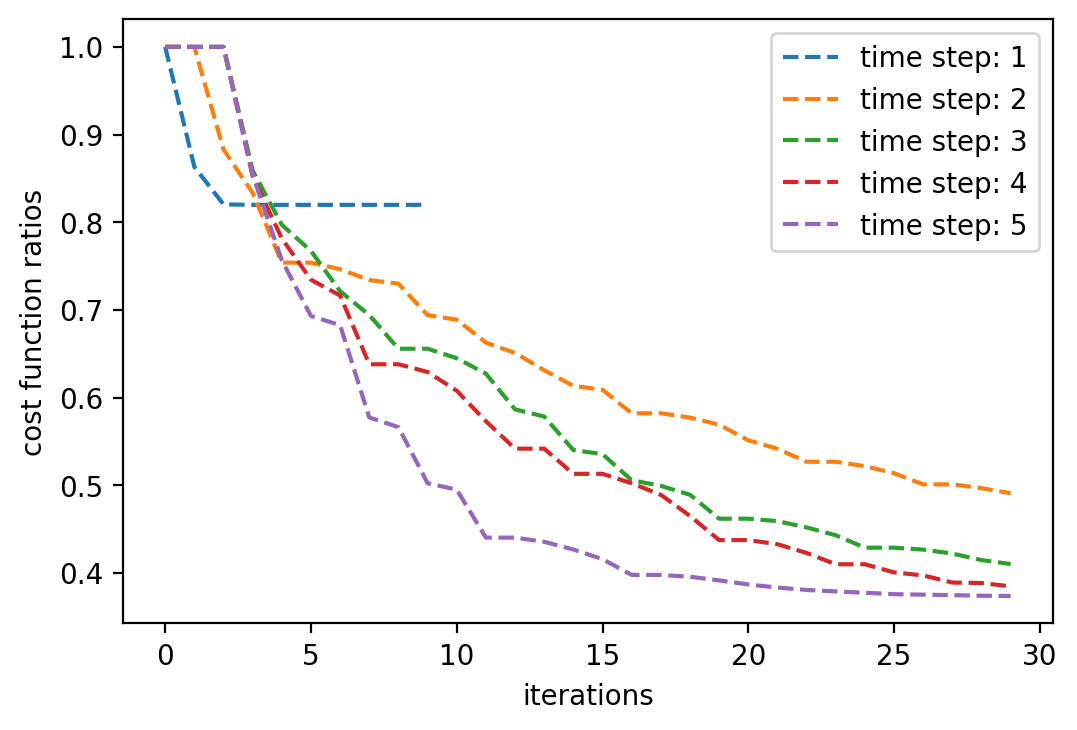

In [118]:
plt.figure(dpi=200)
plt.ylabel('cost function ratios')
plt.xlabel('iterations')
plt.plot(ratios_tau_half_ts_1, '--', label='time step: 1')
plt.plot(ratios_tau_half_ts_2, '--', label='time step: 2')
plt.plot(ratios_tau_half_ts_3 , '--', label='time step: 3')
plt.plot(ratios_tau_half_ts_4 , '--', label='time step: 4')
plt.plot(ratios_tau_half_ts_5 , '--', label='time step: 5')

plt.legend()

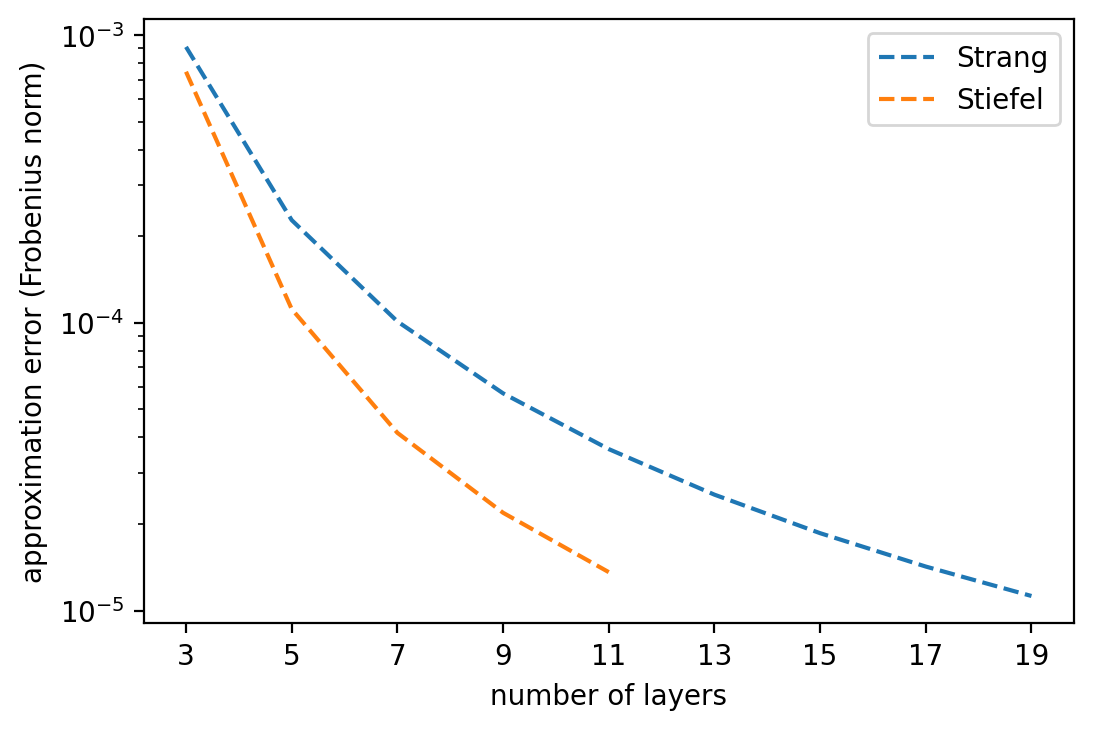

In [160]:
fig = plt.figure(dpi=200)
ax = plt.gca()
plt.ylabel('approximation error (Frobenius norm)')
plt.xlabel('number of layers')
plt.semilogy(error_suzuki_tau_half, '--', label='Strang')
plt.semilogy(error_stiefel_tau_half, '--', label='Stiefel')
set_discrete_labels(labels=[str(index) for index in (2*np.arange(1,len(error_suzuki_tau_half_scaled)+1) + 1)], ax=ax, rotation=0)
plt.legend()